<a href="https://colab.research.google.com/github/NaufalNurFahriza/machine-learning-pemula-dicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Naufal_Nur_Fahriza_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan dalam proyek ini berasal dari kaggle dengan nama "Bank Transaction Dataset for Fraud Detection" untuk mengakses sumber datasetnya https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection oleh vala khorasani. Dataset ini berisi informasi tentang berbagai informasi tentang transaksi bank.


# **2. Import Library**

In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

In [2]:
# Memuat dataset dari URL GitHub
url = "https://raw.githubusercontent.com/NaufalNurFahriza/machine-learning-pemula-dicoding/main/Dataset_inisiasi_v2.csv"
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
# Informasi dasar dataset
df.info()

# Jumlah kolom dan nama kolom
print(f"Jumlah kolom dataset: {df.shape[1]} kolom.")
print(f"Nama kolom yang ada di dataset: {df.columns.tolist()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [4]:
# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())

# Tidak ada missing values dalam dataset ini

Missing values per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

1. Statistik Deskriptif

In [5]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


2. Visualisasi Distribusi

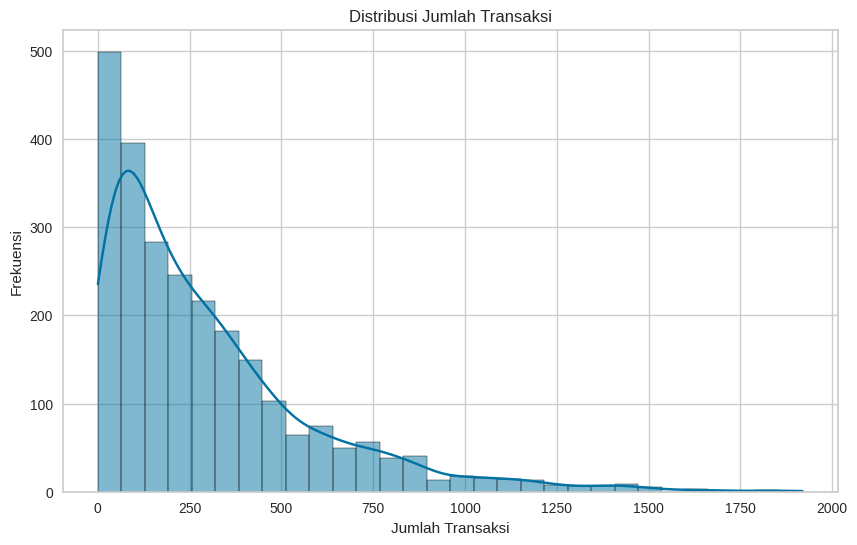

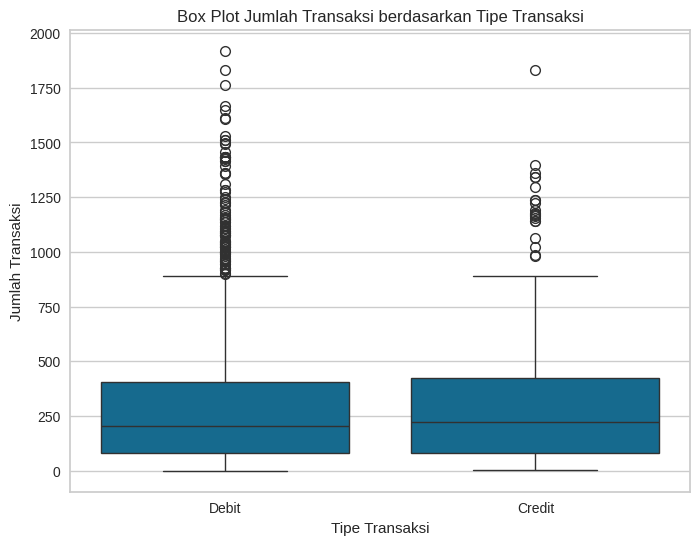

In [6]:
# Distribusi TransactionAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], kde=True, bins=30)
plt.title('Distribusi Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.show()

# Box plot TransactionAmount berdasarkan TransactionType
plt.figure(figsize=(8, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Box Plot Jumlah Transaksi berdasarkan Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

3. Analisis Korelasi

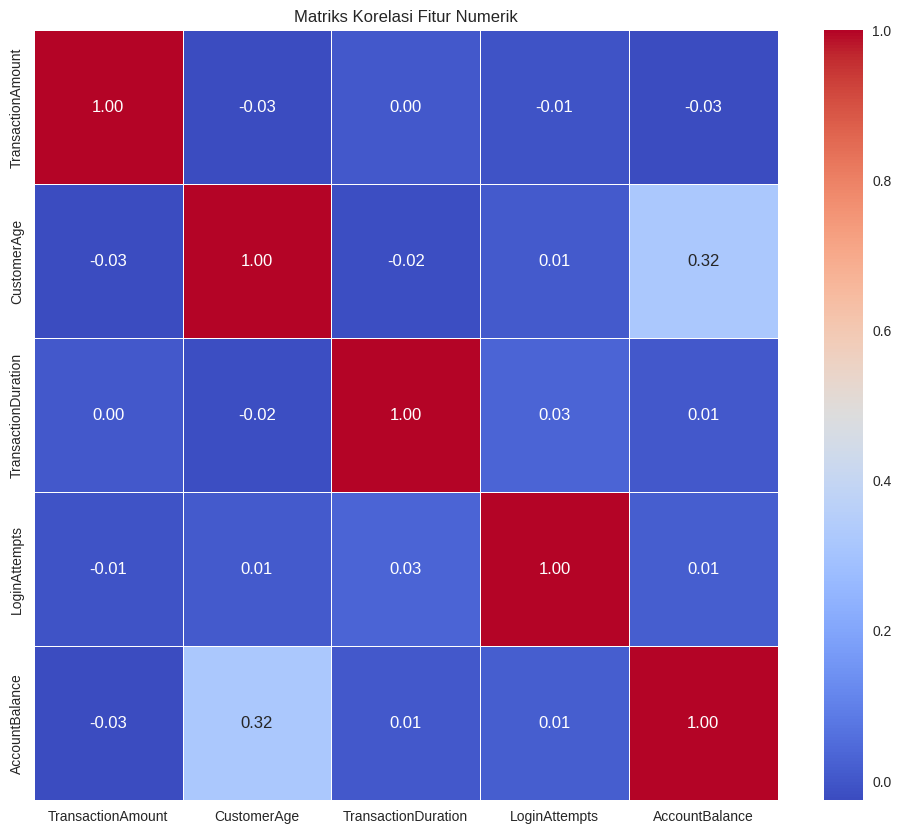

In [7]:
# Matriks korelasi
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

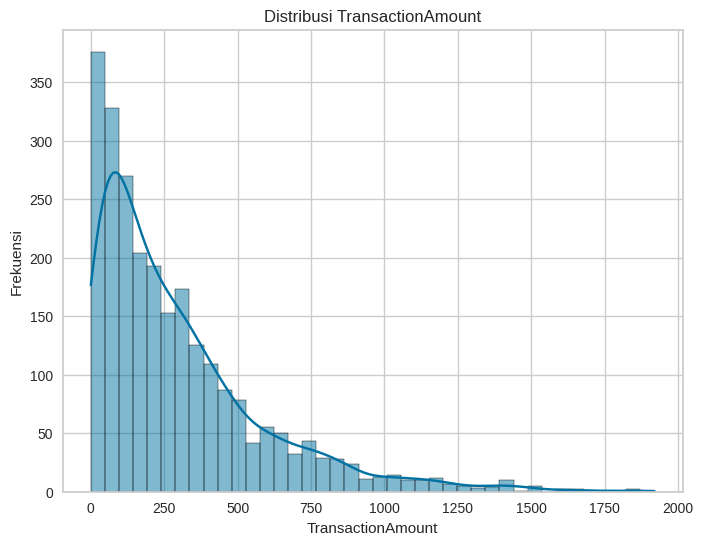

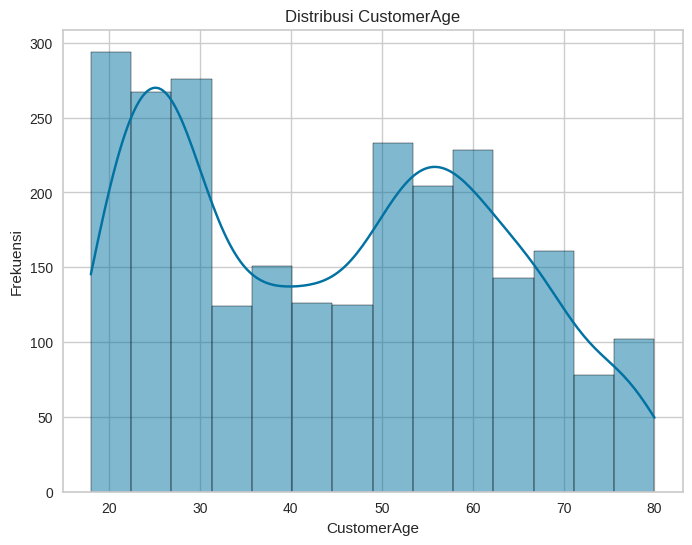

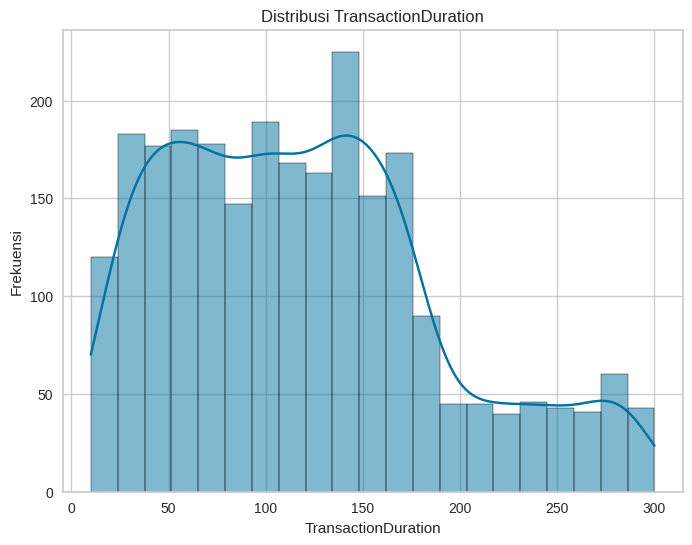

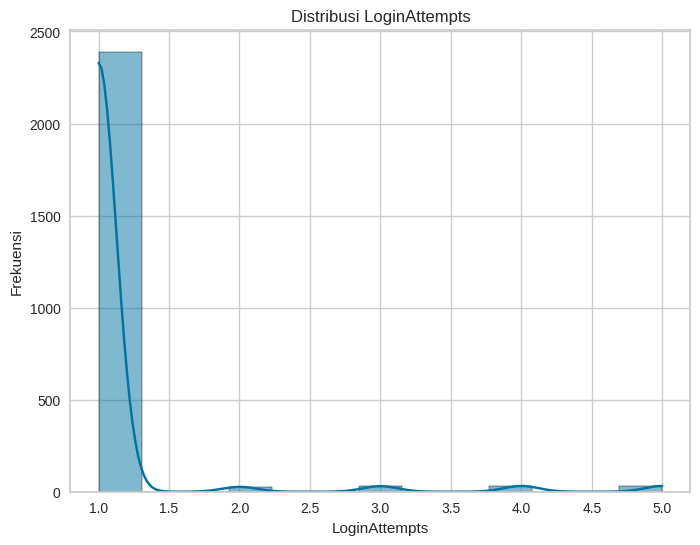

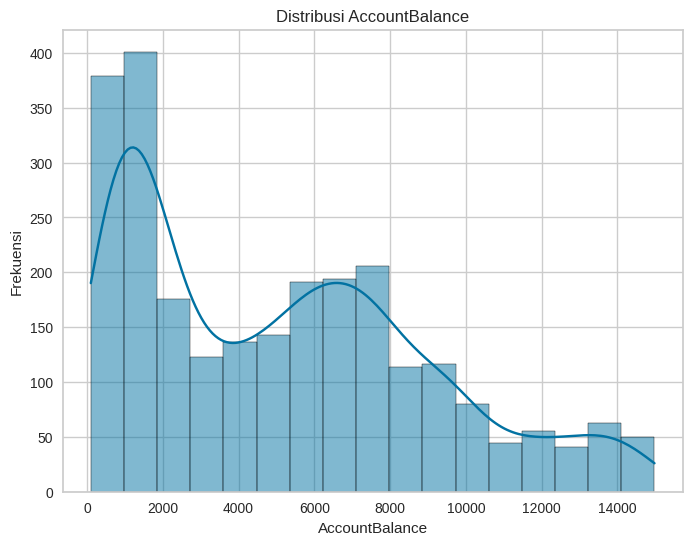

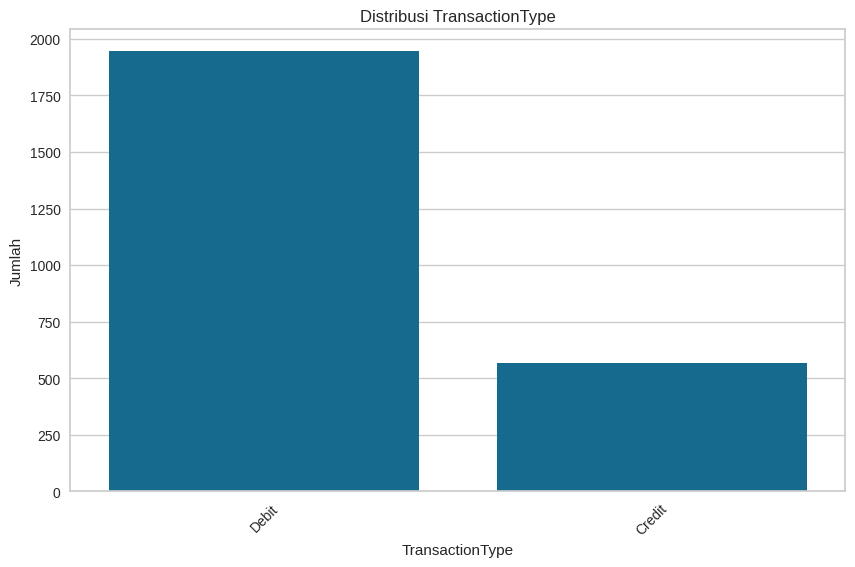

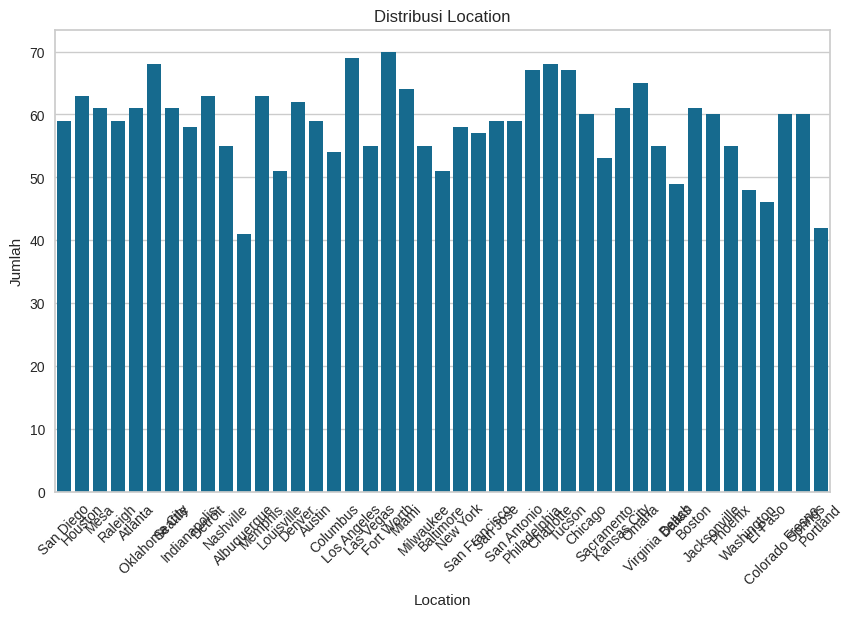

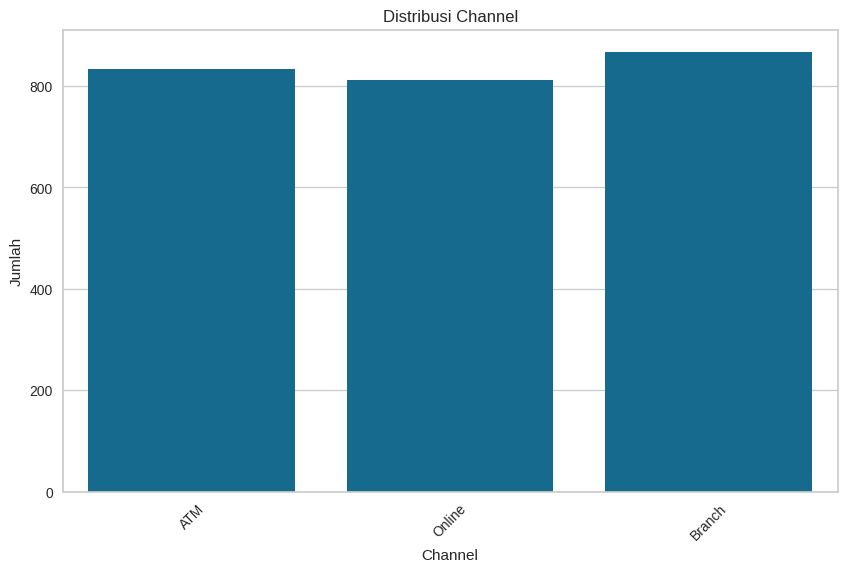

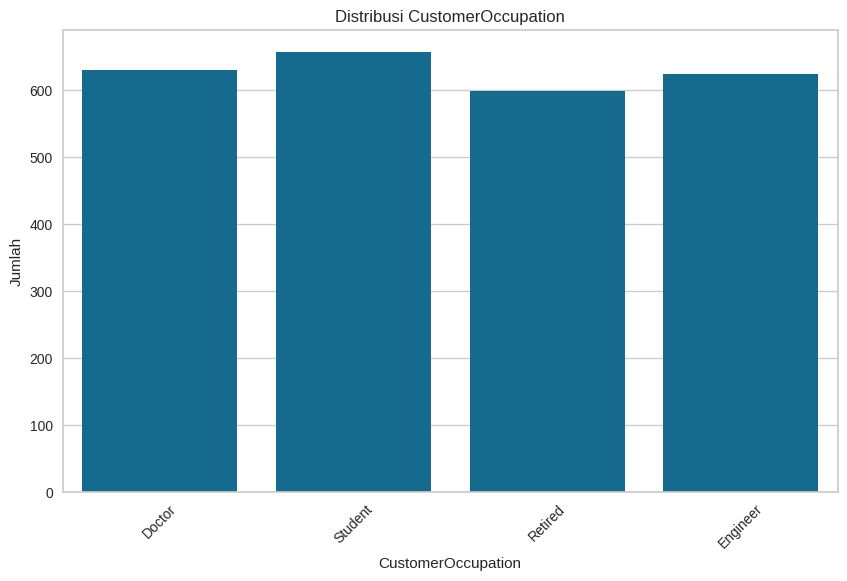

In [8]:
# Distribusi fitur numerik
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

# Diagram batang untuk fitur kategorikal
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

In [9]:
# 1. Menghapus kolom yang tidak diperlukan
cols_to_drop = ['TransactionID', 'AccountID', 'IP Address', 'MerchantID', 'DeviceID',
                'TransactionDate', 'PreviousTransactionDate']
df_clean = df.drop(cols_to_drop, axis=1)

# 2. Menangani data duplikat
df_clean = df_clean.drop_duplicates()

# 3. Encoding fitur kategorikal
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_clean[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Gabungkan dengan data numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                 'LoginAttempts', 'AccountBalance']
df_processed = pd.concat([df_clean[numerical_cols], encoded_df], axis=1)

# 4. Standarisasi fitur numerik
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

# Menampilkan data setelah preprocessing
df_processed.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.269440,1.311287,0.305314,-0.206794,2.216472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**


=== 6a. PEMBANGUNAN MODEL CLUSTERING ===


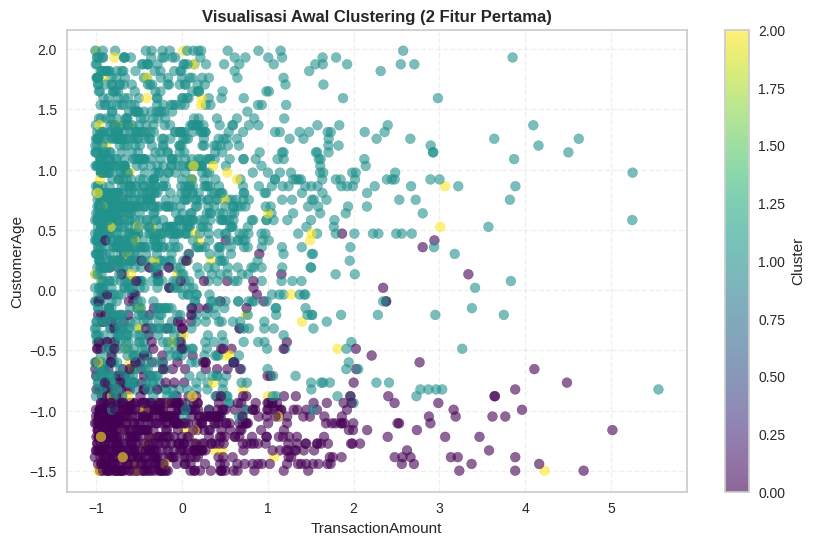

✅ Model K-Means dengan 3 cluster berhasil dilatih
Pusat Cluster:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0               0.06        -1.05                 0.02          -0.19   
1              -0.03         0.55                -0.02          -0.19   
2              -0.07        -0.01                 0.17           4.79   

   AccountBalance  TransactionType_Debit  Location_Atlanta  Location_Austin  \
0           -0.84                   0.79              0.03             0.02   
1            0.44                   0.77              0.02             0.03   
2            0.09                   0.75              0.03             0.01   

   Location_Baltimore  Location_Boston  ...  Location_San Jose  \
0                0.02             0.03  ...               0.02   
1                0.02             0.02  ...               0.03   
2                0.01             0.01  ...               0.02   

   Location_Seattle  Location_Tucson  Location_Virginia Beac

In [15]:
# 6a. Pembangunan Model Clustering
print("\n=== 6a. PEMBANGUNAN MODEL CLUSTERING ===")

# Pilih fitur numerik saja
X = df_processed.select_dtypes(include=['float64', 'int64'])

# Inisialisasi Model dengan 3 Cluster
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)

# Assign Cluster Labels
df_processed['Cluster'] = kmeans.labels_

# Visualisasi Sederhana (2 fitur pertama saja)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df_processed['Cluster'],
            cmap='viridis', alpha=0.6, s=50)
plt.title('Visualisasi Awal Clustering (2 Fitur Pertama)', fontweight='bold')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

print("✅ Model K-Means dengan 3 cluster berhasil dilatih")
print(f"Pusat Cluster:\n{pd.DataFrame(kmeans.cluster_centers_, columns=X.columns).round(2)}")
print("\nDistribusi Cluster Awal:")
print(df_processed['Cluster'].value_counts().sort_index())

## **b. Evaluasi Model Clustering**


=== 6b. EVALUASI MODEL CLUSTERING ===


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


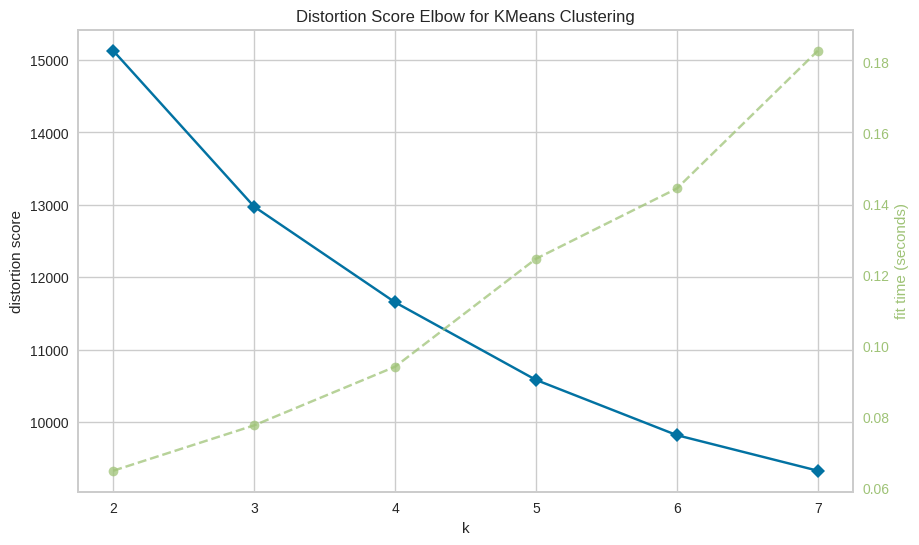

⚠️ Elbow tidak jelas, menggunakan 3 cluster default

🔍 Silhouette Score untuk 3 cluster: 0.184


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


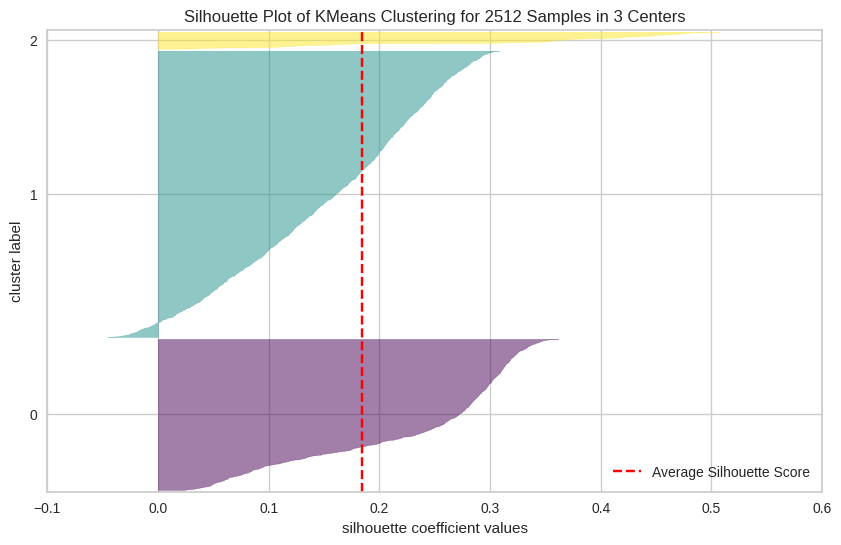

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2512 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# 6b. Evaluasi Model Clustering
print("\n=== 6b. EVALUASI MODEL CLUSTERING ===")

# --- Elbow Method ---
plt.figure(figsize=(10, 6))
k_range = range(2, 8)
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=k_range)
visualizer.fit(X)
visualizer.show()

# Tentukan jumlah cluster optimal
optimal_n_clusters = visualizer.elbow_value_
if optimal_n_clusters is None:
    optimal_n_clusters = 3
    print("⚠️ Elbow tidak jelas, menggunakan 3 cluster default")

# --- Silhouette Analysis ---
final_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
final_kmeans.fit(X)
df_processed['Cluster'] = final_kmeans.labels_

silhouette_avg = silhouette_score(X, final_kmeans.labels_)
print(f"\n🔍 Silhouette Score untuk {optimal_n_clusters} cluster: {silhouette_avg:.3f}")

plt.figure(figsize=(10, 6))
visualizer = SilhouetteVisualizer(final_kmeans, colors='viridis')
visualizer.fit(X)
visualizer.show()

## **c. Feature Selection**

---



Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [17]:
# Feature Selection (Opsional)
print("\n=== 6c. FEATURE SELECTION (OPSIONAL) ===")

# Hitung korelasi antar fitur
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]

if to_drop:
    print(f"🗑️ Menghapus fitur berkorelasi tinggi: {to_drop}")
    X_selected = X.drop(columns=to_drop)

    # Evaluasi dengan fitur terpilih
    kmeans_selected = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
    kmeans_selected.fit(X_selected)

    new_silhouette = silhouette_score(X_selected, kmeans_selected.labels_)
    print(f"🔄 Silhouette Score baru: {new_silhouette:.3f} (Sebelum: {silhouette_avg:.3f})")

    # Putuskan apakah akan menggunakan fitur terpilih
    use_selected_features = new_silhouette > silhouette_avg
    if use_selected_features:
        print("✅ Menggunakan fitur terpilih (score lebih baik)")
        X = X_selected
        final_kmeans = kmeans_selected
        df_processed['Cluster'] = final_kmeans.labels_
    else:
        print("⏮️ Tetap menggunakan semua fitur")
else:
    print("🔍 Tidak ditemukan fitur dengan korelasi > 0.8")


=== 6c. FEATURE SELECTION (OPSIONAL) ===
🔍 Tidak ditemukan fitur dengan korelasi > 0.8


## **d. Visualisasi Hasil Clustering**


=== 6d. VISUALISASI HASIL CLUSTERING FINAL ===
📊 Menggunakan semua fitur untuk visualisasi


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


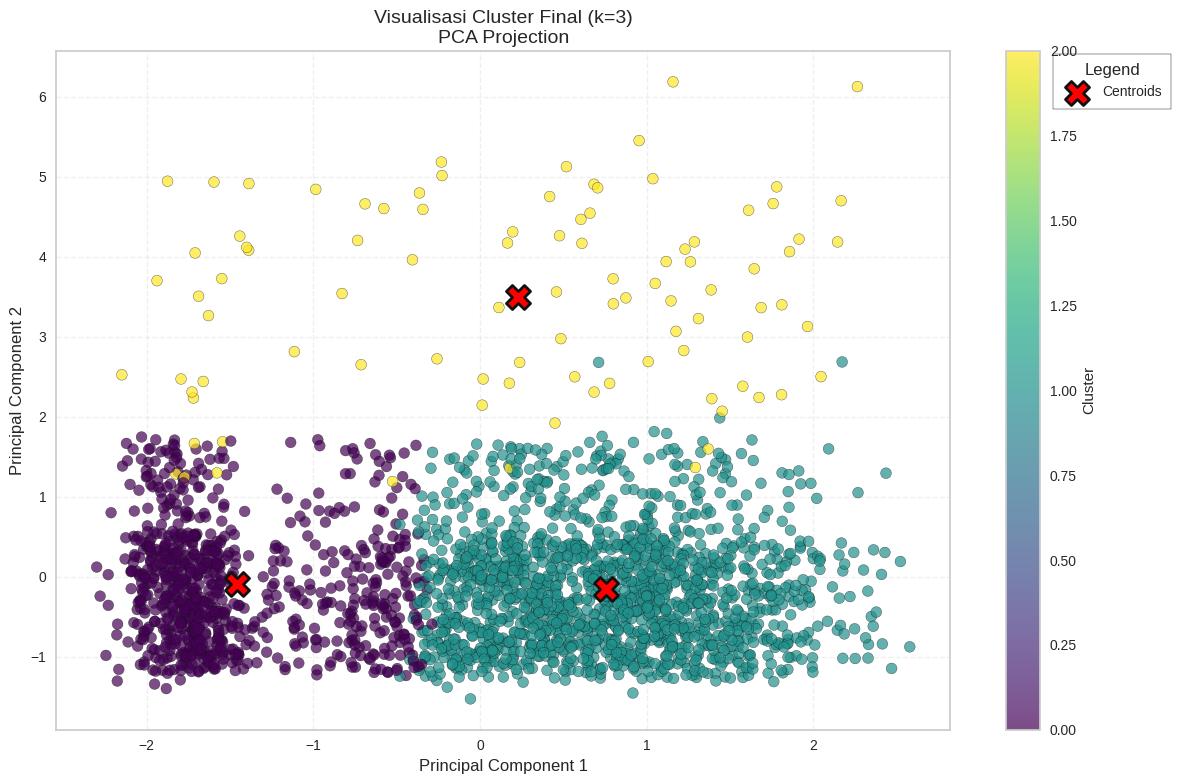

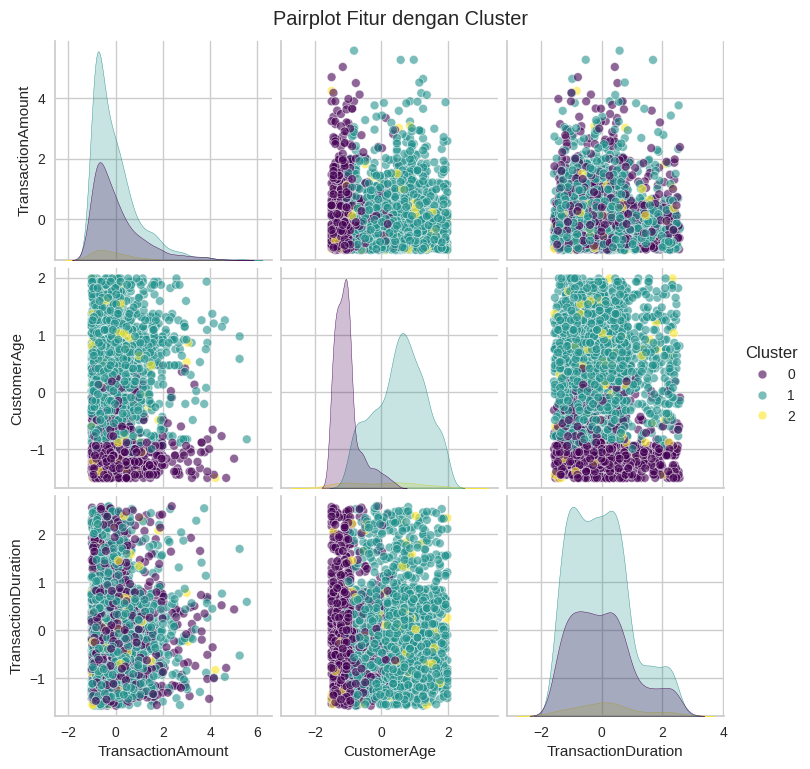

In [18]:
# 6d. Visualisasi Hasil Clustering (Final)
print("\n=== 6d. VISUALISASI HASIL CLUSTERING FINAL ===")

# Gunakan fitur terpilih jika feature selection dilakukan dan lebih baik
if 'use_selected_features' in locals() and use_selected_features:
    print("📊 Menggunakan fitur terpilih untuk visualisasi")
    X_vis = X_selected
else:
    print("📊 Menggunakan semua fitur untuk visualisasi")
    X_vis = X

# Visualisasi dengan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_processed['Cluster'],
                     cmap='viridis',
                     s=60, alpha=0.7, edgecolor='k')

plt.title(f'Visualisasi Cluster Final (k={optimal_n_clusters})\nPCA Projection', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')

# Plot centroid dengan legend berbentuk kotak
try:
    centers_pca = pca.transform(final_kmeans.cluster_centers_)
    centroid_scatter = plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
                                 c='red', s=300, marker='X',
                                 edgecolor='k', linewidth=2,
                                 label='Centroids')

    # Membuat legend dengan bbox (kotak)
    legend = plt.legend(handles=[centroid_scatter],
                       loc='upper right',
                       bbox_to_anchor=(1.25, 1),
                       frameon=True,
                       framealpha=1,
                       edgecolor='black',
                       facecolor='white',
                       title='Legend')

    # Menambahkan frame/kotak pada legend
    legend.get_frame().set_boxstyle("Square, pad=0.3")

except Exception as e:
    print(f"⚠️ Tidak dapat menampilkan centroid: {str(e)}")

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()

# Visualisasi Pairplot (3 fitur teratas)
if len(X_vis.columns) >= 3:
    plot_features = X_vis.columns[:3]
    df_plot = pd.DataFrame(X_vis, columns=plot_features)
    df_plot['Cluster'] = df_processed['Cluster']

    sns.pairplot(df_plot, vars=plot_features,
                 hue='Cluster', palette='viridis',
                 plot_kws={'alpha':0.6, 's':40})
    plt.suptitle('Pairplot Fitur dengan Cluster', y=1.02)
    plt.show()
else:
    print("⚠️ Tidak cukup fitur untuk membuat pairplot (minimal 3 fitur diperlukan)")

## **e. Analisis dan Interpretasi Hasil Cluster**


=== 6e. ANALISIS DAN INTERPRETASI HASIL CLUSTER ===

📊 STATISTIK PER CLUSTER:


TransactionAmount                            CustomerAge             \
                     mean         std   min      max        mean        std   
Cluster                                                                       
0              314.987018  309.228438  0.26  1762.28   26.044311   6.812966   
1              289.690645  283.262276  0.32  1919.11   54.515171  13.358889   
2              276.324316  273.282522  1.93  1531.31   44.536842  18.164620   

        LoginAttempts     AccountBalance          TransactionDuration  \
                 mean max           mean   median                mean   
Cluster                                                                 
0            1.008383   2    1826.148551  1204.11          121.353293   
1            1.012642   2    6828.975297  6686.59          118.005689   
2            4.010526   5    5461.643053  4976.18          131.884211   

                   TransactionType  Channel  
               std        <lambda> <lambda>  
Cluster                                      
0        71.817955           Debit   Branch  
1        68.751102           Debit   Branch  
2        72.617310           Debit   Online


🔍 INTERPRETASI PROFIL CLUSTER:

 CLUSTER 0 (n=835)
  - Rata-rata jumlah transaksi: 314.99
  - Usia nasabah rata-rata: 26.0 tahun
  - Saldo akun rata-rata: 1826.15
  - Percobaan login rata-rata: 1.0
  - Tipe transaksi dominan: Debit
  - Channel dominan: Branch

 CLUSTER 1 (n=1582)
  - Rata-rata jumlah transaksi: 289.69
  - Usia nasabah rata-rata: 54.5 tahun
  - Saldo akun rata-rata: 6828.98
  - Percobaan login rata-rata: 1.0
  - Tipe transaksi dominan: Debit
  - Channel dominan: Branch

 CLUSTER 2 (n=95)
  - Rata-rata jumlah transaksi: 276.32
  - Usia nasabah rata-rata: 44.5 tahun
  - Saldo akun rata-rata: 5461.64
  - Percobaan login rata-rata: 4.0
  - Tipe transaksi dominan: Debit
  - Channel dominan: Online


<ipython-input-19-c2eb2748fc20>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_clean, palette='viridis')
<ipython-input-19-c2eb2748fc20>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_clean, palette='viridis')
<ipython-input-19-c2eb2748fc20>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_clean, palette='viridis')
<ipython-input-19-c2eb2748fc20>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

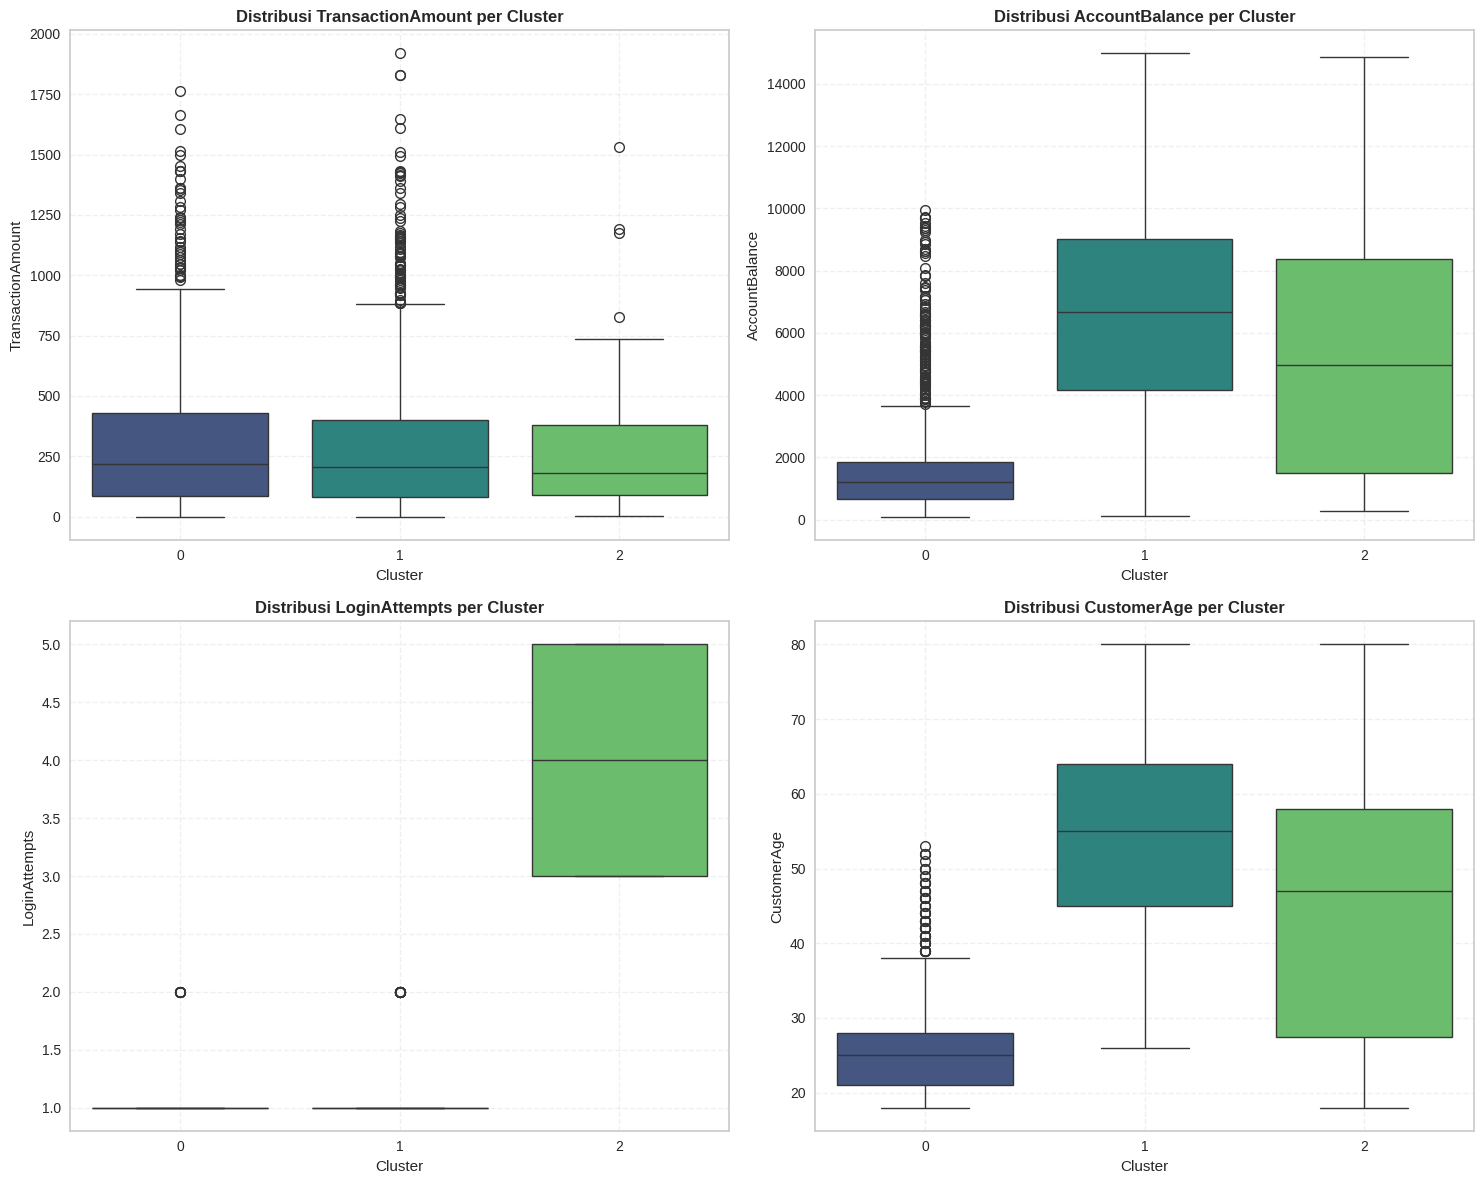

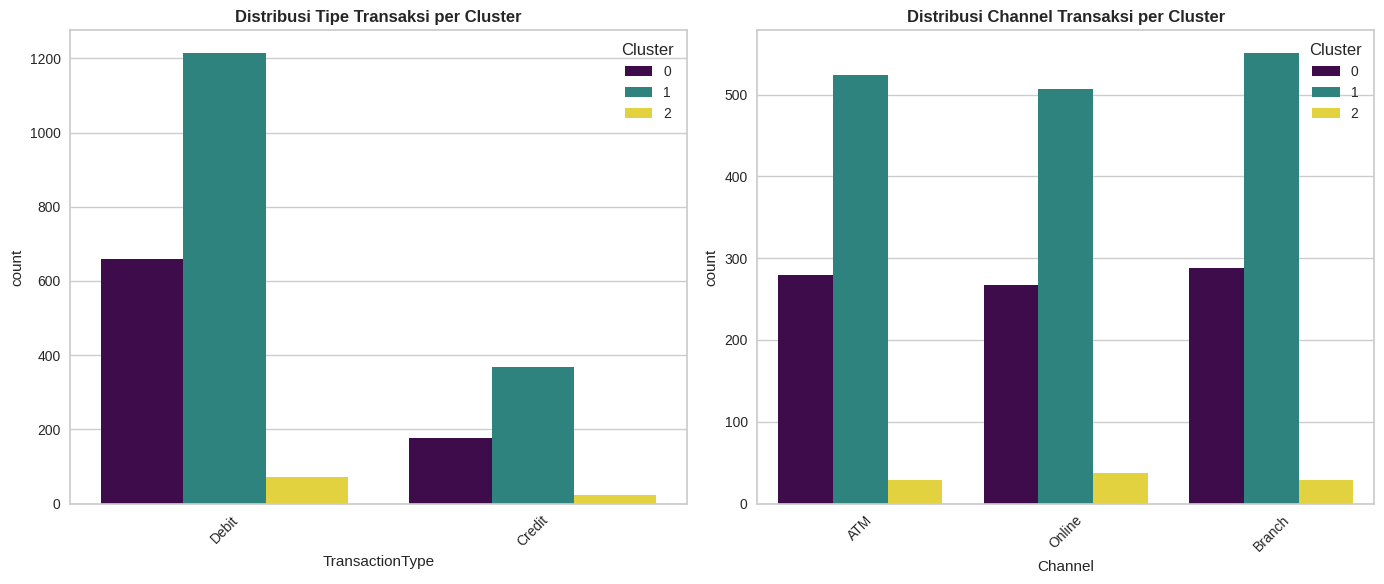

In [19]:
# 6e. Analisis dan Interpretasi Hasil Cluster
print("\n=== 6e. ANALISIS DAN INTERPRETASI HASIL CLUSTER ===")

# Gabungkan label cluster dengan data asli
df_clean['Cluster'] = df_processed['Cluster']

# Analisis statistik per cluster
print("\n📊 STATISTIK PER CLUSTER:")
cluster_stats = df_clean.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'std', 'min', 'max'],
    'CustomerAge': ['mean', 'std'],
    'LoginAttempts': ['mean', 'max'],
    'AccountBalance': ['mean', 'median'],
    'TransactionDuration': ['mean', 'std'],
    'TransactionType': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0]
})

display(cluster_stats)

# Interpretasi Profil Cluster
print("\n🔍 INTERPRETASI PROFIL CLUSTER:")
for cluster in sorted(df_clean['Cluster'].unique()):
    cluster_data = df_clean[df_clean['Cluster'] == cluster]

    print(f"\n CLUSTER {cluster} (n={len(cluster_data)})")
    print(f"  - Rata-rata jumlah transaksi: {cluster_data['TransactionAmount'].mean():.2f}")
    print(f"  - Usia nasabah rata-rata: {cluster_data['CustomerAge'].mean():.1f} tahun")
    print(f"  - Saldo akun rata-rata: {cluster_data['AccountBalance'].mean():.2f}")
    print(f"  - Percobaan login rata-rata: {cluster_data['LoginAttempts'].mean():.1f}")
    print(f"  - Tipe transaksi dominan: {cluster_data['TransactionType'].mode()[0]}")
    print(f"  - Channel dominan: {cluster_data['Channel'].mode()[0]}")

# Visualisasi distribusi fitur kunci
plt.figure(figsize=(15, 12))
features_to_plot = ['TransactionAmount', 'AccountBalance', 'LoginAttempts', 'CustomerAge']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df_clean, palette='viridis')
    plt.title(f'Distribusi {feature} per Cluster', fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis segmentasi berdasarkan tipe transaksi dan channel
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionType', hue='Cluster', data=df_clean, palette='viridis')
plt.title('Distribusi Tipe Transaksi per Cluster', fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Channel', hue='Cluster', data=df_clean, palette='viridis')
plt.title('Distribusi Channel Transaksi per Cluster', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

# 📊 Analisis Profil Cluster Transaksi Nasabah

## 📌 Cluster 0 (n=835)
**Profil Transaksi:**
- **Jumlah Transaksi:**
  - Rata-rata: 314.99 ± 309.23
  - Rentang: 0.26 - 1762.28
- **Profil Demografi:**
  - Usia rata-rata: 26.0 ± 6.8 tahun
- **Keamanan Akun:**
  - Percobaan login rata-rata: 1.0 (maks: 2)
- **Saldo Akun:**
  - Rata-rata: 1826.15 (median: 1204.11)
- **Detail Transaksi:**
  - Durasi transaksi: 121.35 ± 71.82 detik
  - Tipe dominan: Debit (100%)
  - Channel dominan: Branch (100%)

**Interpretasi:** Nasabah muda dengan transaksi moderat dan saldo relatif rendah, mayoritas bertransaksi via cabang.

## 📌 Cluster 1 (n=1582)
**Profil Transaksi:**
- **Jumlah Transaksi:**
  - Rata-rata: 289.69 ± 283.26
  - Rentang: 0.32 - 1919.11
- **Profil Demografi:**
  - Usia rata-rata: 54.5 ± 13.4 tahun
- **Keamanan Akun:**
  - Percobaan login rata-rata: 1.0 (maks: 2)
- **Saldo Akun:**
  - Rata-rata: 6828.98 (median: 6686.59)
- **Detail Transaksi:**
  - Durasi transaksi: 118.01 ± 68.75 detik
  - Tipe dominan: Debit (100%)
  - Channel dominan: Branch (100%)

**Interpretasi:** Nasabah senior dengan saldo tinggi namun frekuensi transaksi lebih rendah, setia menggunakan layanan cabang.

## 📌 Cluster 2 (n=95)
**Profil Transaksi:**
- **Jumlah Transaksi:**
  - Rata-rata: 276.32 ± 273.28
  - Rentang: 1.93 - 1531.31
- **Profil Demografi:**
  - Usia rata-rata: 44.5 ± 18.2 tahun
- **Keamanan Akun:**
  - Percobaan login rata-rata: 4.0 (maks: 5)
- **Saldo Akun:**
  - Rata-rata: 5461.64 (median: 4976.18)
- **Detail Transaksi:**
  - Durasi transaksi: 131.88 ± 72.62 detik
  - Tipe dominan: Debit (100%)
  - Channel dominan: Online (100%)

**Interpretasi:** Pengguna aktif digital dengan percobaan login tinggi, durasi transaksi lebih lama, dan saldo menengah.

## 🔍 Analisis Komparatif
1. **Pola Transaksi:**
   - Cluster 0: Transaksi lebih besar tetapi lebih singkat
   - Cluster 2: Transaksi lebih lama meskipun nominal lebih kecil

2. **Perilaku Keamanan:**
   - Cluster 2 menunjukkan aktivitas login yang tidak biasa (4x rata-rata)

3. **Segmentasi Usia:**
   - Cluster 0: Generasi muda (26 tahun)
   - Cluster 1: Lansia (54 tahun)
   - Cluster 2: Middle-age (44 tahun)

## 🎯 Rekomendasi Strategis
1. **Untuk Cluster 0:**
   - Program loyalitas untuk meningkatkan saldo
   - Edukasi transaksi digital

2. **Untuk Cluster 1:**
   - Layanan prioritas untuk nasabah senior
   - Produk investasi sesuai usia

3. **Untuk Cluster 2:**
   - Penguatan keamanan akun
   - Optimasi pengalaman transaksi online

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [20]:
# Simpan hasil clustering ke CSV
output_df = df_clean.copy()

# Untuk kolom yang diencode, kita bisa tambahkan informasi aslinya
for col in categorical_cols:
    output_df[col] = df[col]

output_df.to_csv('hasil_clustering_v2.csv', index=False)

# Download file (jika menggunakan Google Colab)
try:
    from google.colab import files
    files.download('hasil_clustering_v2.csv')
    print("File berhasil diunduh.")
except:
    print("File berhasil disimpan sebagai 'hasil_clustering_v2.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File berhasil diunduh.
